In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [4]:
forest = RandomForestClassifier (n_estimators=10000,random_state=0,n_jobs=-1)

In [ ]:
df=pd.read_csv("CBvsBreakCBClasses.csv",names=['Gain', 'Pen', 'X', 'incGain', 'incPen', 'incX', 'incGainх[-1]', 'incPen[-1]', 'incX[-1]', 'incGain[-2]', 'incPen[-2]', 'incX[-2]','class'])
df.tail()

In [12]:
feat_labels = df.columns[:12]

In [7]:
y=df.iloc[:,12]
X=df.iloc[:,0:12]

In [8]:
pd.value_counts(y)

1    226
2    103
Name: class, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [15]:
forest.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]

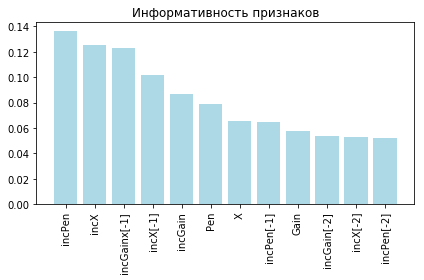

In [20]:
plt.title('Информативность признаков')
plt.bar(range(X.shape[1]), importances[indices],color='lightblue', align='center')
plt.xticks(range(X.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout ()
#plt.show()
plt.savefig('fig1.png',dpi=200)

In [21]:
indices

array([ 4,  5,  6,  8,  3,  1,  2,  7,  0,  9, 11, 10], dtype=int64)

In [1]:
bestfeatures=[4,5,3]

In [22]:
forest.fit(X_train_std[:,bestfeatures],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
forest.score(X_train_std[:,bestfeatures],y_train)

1.0

In [24]:
forest.score(X_test_std[:,bestfeatures],y_test)

0.7575757575757576

In [117]:
df2=df[df['class'] == 2]
y2=df2.iloc[:,12]
X2=df2.iloc[:,0:12]
X2_std = stdsc.transform(X2)

In [118]:
forest.score(X2_std[:,bestfeatures],y2)

0.7961165048543689

In [1]:
pd.read_clipboard()

NameError: name 'pd' is not defined